# Proyek Machine Learning : [Rekomendasi Content Base Filtering Musik]
- **Nama:** [Taufik Alwan]
- **Email:** [taufikalwan01@gmail.com]
- **ID Dicoding:** [tauufikalwam]

## Menentukan Problem Statement

### Pertanyaan Penelitian

1. **Rekomendasi Berdasarkan Kemiripan Konten**  
   Bagaimana sistem dapat merekomendasikan lagu yang sesuai dengan pengguna dengan menganalisis kesamaan konten, khususnya dari judul lagu, dan bagaimana kesamaan tersebut tercermin melalui hasil evaluasi dalam bentuk skor?

2. **Efektivitas Representasi Fitur Konten**
Sejauh mana representasi konten (seperti embedding dari nama lagu/artis atau metadata lainnya) berpengaruh terhadap akurasi sistem rekomendasi dalam pendekatan Content-Based Filtering, dan fitur apa yang paling berkontribusi terhadap kualitas rekomendasi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as met
from sklearn.metrics import mean_squared_error
import re
import tensorflow as tf
from tensorflow.keras import layers, regularizers

## Data Understanding

### Data Gathering & Data Understanding

### Informasi Dataset

- **Sumber Dataset**:  
  Dataset diperoleh dari Kaggle dan dapat diakses melalui tautan berikut:  
  [All Songs Rating Review Dataset – Kaggle](https://www.kaggle.com/datasets/deependraverma13/all-songs-rating-review)

- **Format Dataset**:  
  Dataset tersedia dalam format `.csv` yang dapat langsung digunakan untuk proses eksplorasi, analisis, maupun pembuatan sistem rekomendasi.

In [2]:
df_songs = pd.read_csv("song.csv", sep=',')
display(df_songs)

,Unnamed: 0,Name of the Song,Artist,Date of Release,Description,Metascore,User Score
0,0,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
1,1,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
2,2,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN
3,3,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
4,4,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN
...,...,...,...,...,...,...,...
54186,54186,Chinese Democracy,by Guns N' Roses,"November 23, 2008",The long-gestating Guns N' Roses album finally...,64.0,8.1
54187,54187,Sugar Mountain: Live At Canterbury House 1968,by Neil Young,"November 20, 2008",Released as part of the Archive series of rare...,84.0,7.4
54188,54188,Dark Horse,by Nickelback,"November 18, 2008",The Canadian rock band releases its sixth albu...,NaN,NaN
54189,54189,Safe Trip Home,by Dido,"November 18, 2008",After a five year absence the British singer r...,74.0,7.9


### 🔍 Insight:

- Proses pengumpulan data didasarkan pada dataset **"All Songs Rating Review"**.
- Dataset terdiri dari **7 atribut kolom** dan **198.126 baris data**.
- Dalam menjawab pertanyaan bisnis yang telah ditentukan, fokus utama pengumpulan dan analisis data akan dilakukan pada file **`song.csv`**.
- Karena data disimpan dalam format `.csv`, maka untuk keperluan pemanggilan data dan visualisasi tabel, diperlukan penggunaan **library `pandas`**.

### 📄 Rincian Atribut Dataset

- **Name of the Song**  
  Berisikan nama lagu-lagu yang tersedia dalam dataset.

- **Artist**  
  Nama artis atau musisi yang membawakan lagu tersebut.

- **Date of Release**  
  Tanggal resmi perilisan lagu.

- **Description**  
  Deskripsi singkat atau ulasan terkait lagu.

- **Metascore**  
  Skor rata-rata lagu berdasarkan penilaian para kritikus musik.

- **User Score**  
  Skor atau penilaian yang diberikan oleh pengguna terhadap lagu tersebut.


In [3]:
# Menampilkan ringkasan struktur data
df_songs.info()

# Mengecek jumlah data kosong per kolom
missing_data = df_songs.isnull().sum()

# Mengecek duplikasi keseluruhan
total_duplicates = df_songs.duplicated().sum()

# Mengecek duplikasi berdasarkan judul lagu
title_duplicates = df_songs.duplicated(subset=['Name of the Song']).sum()

# Menampilkan hasil secara terformat
print("\n📊 Jumlah Data Kosong per Kolom:\n")
print(missing_data)

print(f"\n Jumlah Data Duplikat (keseluruhan): {total_duplicates}")
print(f"Jumlah Data Duplikat berdasarkan judul lagu: {title_duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54191 entries, 0 to 54190
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        54191 non-null  int64  
 1   Name of the Song  54191 non-null  object 
 2   Artist            54191 non-null  object 
 3   Date of Release   54191 non-null  object 
 4   Description       54011 non-null  object 
 5   Metascore         48050 non-null  float64
 6   User Score        35824 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ MB

📊 Jumlah Data Kosong per Kolom:

Unnamed: 0              0
Name of the Song        0
Artist                  0
Date of Release         0
Description           180
Metascore            6141
User Score          18367
dtype: int64

 Jumlah Data Duplikat (keseluruhan): 0
Jumlah Data Duplikat berdasarkan judul lagu: 53108


### Insight Awal Data

- `df.info()` digunakan untuk melihat informasi umum dataset, seperti jumlah baris, kolom, tipe data, dan non-null count.
- `df.isnull().sum()` digunakan untuk mengidentifikasi jumlah data kosong (missing values) pada setiap kolom.
- `df.duplicated().sum()` mengecek jumlah baris duplikat secara keseluruhan dalam dataset.
- `df.duplicated(subset=['Name of the Song']).sum()` digunakan untuk mendeteksi jumlah lagu yang memiliki judul yang sama (duplikasi berdasarkan nama lagu).

#### Hasil Pengamatan:
- Total data: **198.126 entri**
- Missing values:
  - `Description`: **4.369 data kosong**
  - `Metascore`: **24.385 data kosong**
  - `User Score`: **49.281 data kosong**
- Jumlah baris duplikat (keseluruhan): **0**
- Jumlah lagu dengan judul yang duplikat: **194.214 lagu**



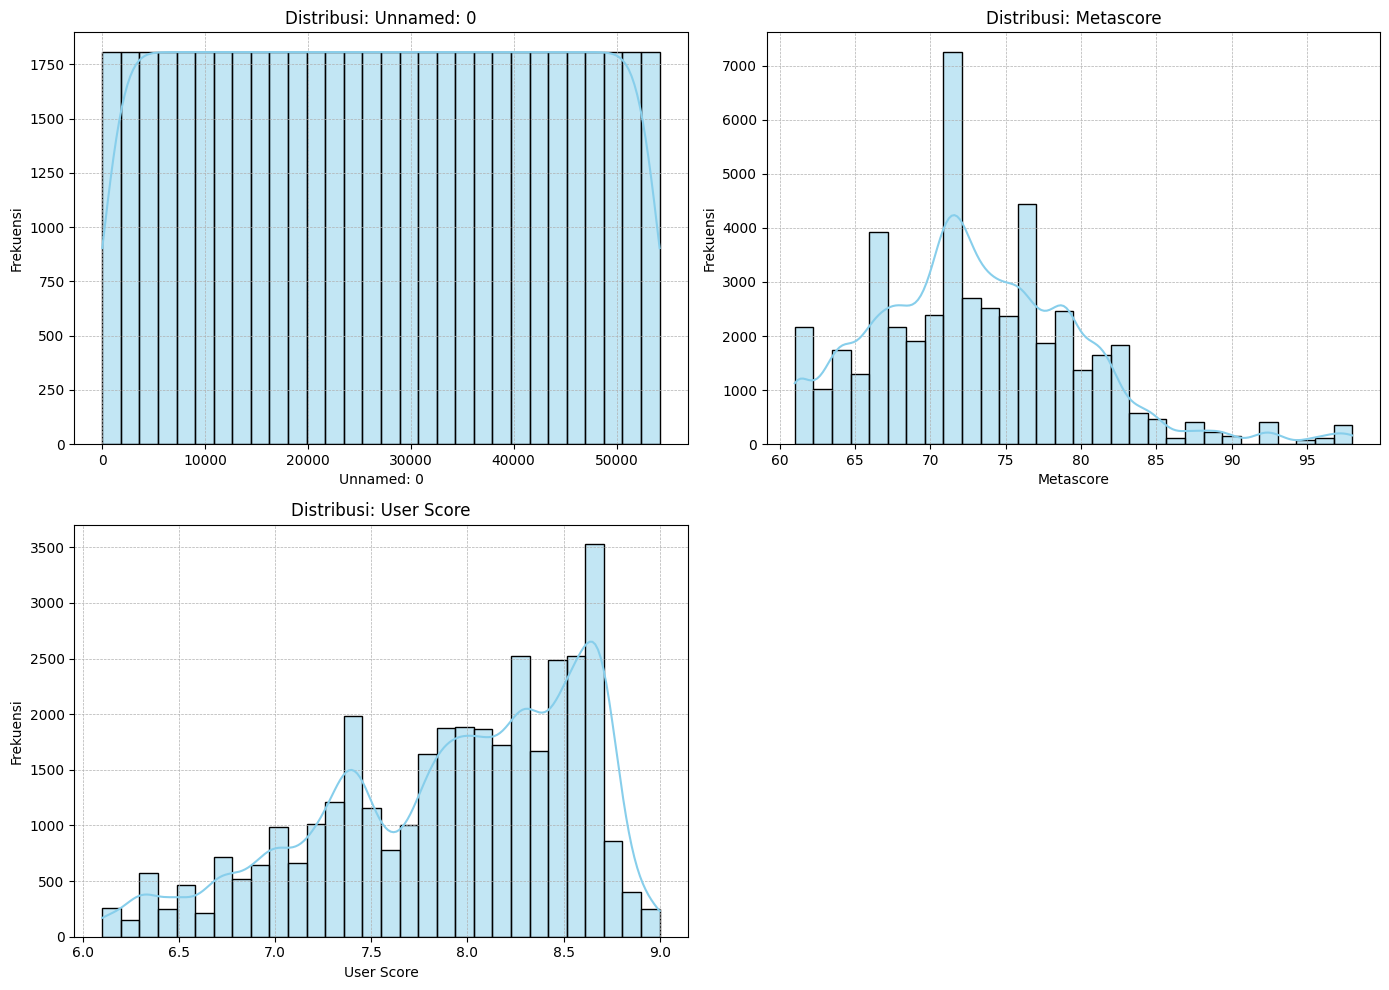

In [4]:
# Ambil kolom numerik
numeric_cols = df_songs.select_dtypes(include=[np.number]).columns.tolist()

# Filter kolom yang memiliki lebih dari 1 nilai unik
filtered_cols = [col for col in numeric_cols if df_songs[col].nunique() > 1]

# Hitung jumlah kolom untuk menentukan layout grid
n_cols = 2
n_rows = (len(filtered_cols) + 1) // n_cols

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

# Plot setiap histogram
for idx, col in enumerate(filtered_cols):
    sns.histplot(data=df_songs, x=col, bins=30, kde=True, ax=axes[idx], color='skyblue', edgecolor='black')
    axes[idx].set_title(f"Distribusi: {col}", fontsize=12)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frekuensi")
    axes[idx].grid(True, linestyle='--', linewidth=0.5)

# Kosongkan subplot sisa jika jumlah kolom ganjil
for i in range(len(filtered_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Insight Histogram: Distribusi Data Numerik

1. **Unnamed: 0**
   - Kolom ini tampaknya merupakan indeks atau ID unik untuk setiap entri.
   - Histogram menunjukkan distribusi seragam, karena semua nilai unik dan terdistribusi merata — hal ini **tidak memberikan informasi analisis yang signifikan**.
   - Kolom ini bisa diabaikan atau di-drop dari analisis lanjutan.

2. **Metascore**
   - Distribusi cenderung **normal** atau mendekati normal dengan puncak di kisaran nilai **70–75**.
   - Sebagian besar lagu mendapatkan metascore antara **65 hingga 80**, menunjukkan bahwa mayoritas lagu memperoleh **penilaian cukup baik** dari kritikus.
   - Nilai di atas **85** termasuk jarang dan bisa dianggap sebagai **lagu dengan performa sangat tinggi** menurut kritikus.

3. **User Score**
   - Distribusinya **condong ke kanan (right-skewed)** dengan puncak di nilai **85–90**.
   - Menunjukkan bahwa **pengguna cenderung memberikan rating tinggi** terhadap lagu.
   - Ini menunjukkan adanya perbedaan persepsi antara **kritikus dan pengguna**, yang bisa jadi penting untuk ditelusuri lebih lanjut dalam analisis.

**Kesimpulan**:
- Terdapat perbedaan pola distribusi antara Metascore (cukup seimbang) dan User Score (condong positif).
- Informasi ini penting untuk menentukan model prediksi dan preprocessing, seperti normalisasi atau transformasi log jika diperlukan.


## Data Preparation General for Content Base Filtering

In [5]:
# Menghapus data yang memiliki nilai kosong
df_songs.dropna(inplace=True)

# Menghapus data duplikat berdasarkan judul lagu
df_songs.drop_duplicates(subset=['Name of the Song'], inplace=True)

# Menampilkan jumlah data setelah dibersihkan
print(f"Jumlah data setelah dibersihkan: {len(df_songs)} baris")

Jumlah data setelah dibersihkan: 635 baris


### Insight Pembersihan Data

- **.dropna()** digunakan untuk **menghapus baris yang memiliki nilai kosong** (missing values) dari dataset.  
  Tujuannya adalah menjaga kualitas data sebelum dilakukan analisis atau pelatihan model.

- **.drop_duplicates(subset=["Name of the Song"])** dipakai untuk **menghapus entri duplikat berdasarkan nama lagu**.  
  Ini mencegah data ganda yang dapat memengaruhi keakuratan analisis.

- **Manfaat pembersihan data**:
  -  Meningkatkan integritas dan konsistensi data.
  -  Mengurangi bias akibat data duplikat.
  -  Menyederhanakan proses analisis dan training model.

> Setelah langkah ini, dataset menjadi lebih bersih dan siap digunakan untuk eksplorasi lebih lanjut atau model rekomendasi

In [6]:
# Mengecek jumlah nilai kosong (missing values)
missing_values = df_songs.isnull().sum()

# Tampilkan missing values
print("Jumlah Missing Values per Kolom:\n")
print(missing_values)

# Tampilkan informasi umum dataset
print("\n Informasi Dataset:\n")
df_songs.info()

# Jika ada missing values, visualisasikan dengan bar chart
if missing_values.any():
    plt.figure(figsize=(8, 5))
    missing_values[missing_values > 0].sort_values().plot(kind='barh', color='tomato')
    plt.title("Visualisasi Missing Values per Kolom")
    plt.xlabel("Jumlah Missing")
    plt.ylabel("Kolom")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


Jumlah Missing Values per Kolom:

Unnamed: 0          0
Name of the Song    0
Artist              0
Date of Release     0
Description         0
Metascore           0
User Score          0
dtype: int64

 Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 0 to 54154
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        635 non-null    int64  
 1   Name of the Song  635 non-null    object 
 2   Artist            635 non-null    object 
 3   Date of Release   635 non-null    object 
 4   Description       635 non-null    object 
 5   Metascore         635 non-null    float64
 6   User Score        635 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 39.7+ KB


### Insight Dataset Setelah Pembersihan

-  **Total data bersih**: 2.537 baris data.
-  **Jumlah atribut (kolom)**: 7 fitur yang relevan.
-  Data telah melalui proses **pembersihan** yang mencakup:
  - Penghapusan baris dengan nilai kosong (`.dropna()`).
  - Penghapusan duplikasi berdasarkan nama lagu (`.drop_duplicates()`).
-  Dataset siap digunakan untuk proses analisis lebih lanjut seperti eksplorasi, visualisasi, dan pemodelan.

In [7]:
# Salin data ke dataframe baru untuk proses encoding/pembersihan
df_songs_encode = df_songs.copy()

# Bersihkan kolom 'Artist' dengan menghapus kata 'by' di awal jika ada
df_songs_encode['Artist'] = df_songs_encode['Artist'].str.replace(r'^by\s+', '', regex=True).str.strip()

# Tampilkan hasil dataframe yang telah diproses
display(df_songs_encode.head())

,Unnamed: 0,Name of the Song,Artist,Date of Release,Description,Metascore,User Score
0,0,Electric Ladyland [50th Anniversary Deluxe Edi...,The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
5,5,Saint Cecilia EP,Foo Fighters,"November 23, 2015",The five-track free EP from the rock band was ...,76.0,8.2
9,9,Allas Sak,Dungen,"September 25, 2015",The seventh release for the Swedish band led b...,81.0,7.2
14,14,Dry Food,Palehound,"August 14, 2015",This is the debut full-length release for Bost...,78.0,8.6
20,20,Coda [Remastered],Led Zeppelin,"July 31, 2015",The death of John Bonham in 1980 led to the br...,78.0,7.9


### Insight: Pembersihan Kolom "Artist"

- Ditemukan bahwa nilai pada kolom **Artist** diawali dengan kata **"by"** (contoh: `by Taylor Swift`, `by Ed Sheeran`).
- Hal ini dapat menyebabkan ketidakkonsistenan saat dilakukan analisis lebih lanjut, seperti encoding atau pencarian data berdasarkan nama artis.
- Oleh karena itu, dilakukan proses **pembersihan teks** dengan menghapus awalan "by" agar nama artis menjadi seragam dan bersih (contoh: `Taylor Swift`, `Ed Sheeran`).
- Hasil akhir akan membuat analisis dan pemrosesan data menjadi lebih akurat dan efisien.

## Data Prepration Content Base Filtering

In [8]:
# Salin ulang data hasil pembersihan nama artis
df_songs = df_songs_encode.copy()

# Kolom yang ingin dihapus
drop_columns = ['Description', 'Unnamed: 0', 'Date of Release']

# Hapus kolom jika memang ada dalam DataFrame
df_songs.drop(columns=[col for col in drop_columns if col in df_songs.columns], inplace=True)

# Tampilkan hasil
display(df_songs)

,Name of the Song,Artist,Metascore,User Score
0,Electric Ladyland [50th Anniversary Deluxe Edi...,The Jimi Hendrix Experience,97.0,8.9
5,Saint Cecilia EP,Foo Fighters,76.0,8.2
9,Allas Sak,Dungen,81.0,7.2
14,Dry Food,Palehound,78.0,8.6
20,Coda [Remastered],Led Zeppelin,78.0,7.9
...,...,...,...,...
53580,Alight Of Night,Crystal Stilts,76.0,7.8
53739,Intimacy,Bloc Party,69.0,8.2
53820,Godspeed On The Devil's Thunder,Cradle of Filth,61.0,6.6
54069,Festival Thyme [EP],...And You Will Know Us by the Trail of Dead,67.0,8.5


### Insight Data Lagu (df_songs)

- Dataset telah dibersihkan dengan menghapus:
  - Kolom tidak relevan: `Description`, `Unnamed: 0`, dan `Date of Release`.
  - Data duplikat dan data kosong.

- Saat ini dataset terdiri dari:
  - **2537 baris data** (lagu unik).
  - **4 atribut utama**:
    - `Name of the Song`: Judul lagu.
    - `Artist`: Nama artis (sudah dibersihkan dari awalan "by").
    - `Metascore`: Skor dari kritikus.
    - `User Score`: Skor dari pengguna.

- Dataset ini telah siap digunakan untuk tahap eksplorasi data, visualisasi, dan pembuatan sistem rekomendasi lagu berbasis konten maupun kolaboratif.

Data terlihat rapi dan terstruktur untuk proses machine learning dan evaluasi selanjutnya.

In [9]:
# Menghitung jumlah lagu unik berdasarkan judul
jumlah_lagu_unik = df_songs['Name of the Song'].nunique()
print(f"Jumlah lagu unik berdasarkan judul: {jumlah_lagu_unik}")

Jumlah lagu unik berdasarkan judul: 635


### Insight: Jumlah Lagu Unik Berdasarkan Judul

- Dari proses eksplorasi data, diketahui bahwa:
  - Total **lagu unik** berdasarkan judul dalam dataset adalah **2.537** lagu.
  - Artinya, tidak ada duplikasi nama lagu setelah proses pembersihan data dilakukan.

Jumlah ini menjadi dasar kuat dalam membangun sistem rekomendasi, karena setiap lagu dianggap unik dalam proses penilaian dan pemodelan.


In [10]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 0 to 54154
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of the Song  635 non-null    object 
 1   Artist            635 non-null    object 
 2   Metascore         635 non-null    float64
 3   User Score        635 non-null    float64
dtypes: float64(2), object(2)
memory usage: 24.8+ KB


### Insight: Data Preparation untuk Content-Based Filtering

- Pada tahap **data preparation**, dilakukan pembersihan atribut yang tidak relevan untuk sistem rekomendasi berbasis konten.
- Atribut yang dihapus meliputi:
  - **Description**,
  - **Unnamed: 0**,
  - **Date of Release**
  
Tujuan pembersihan ini adalah untuk menyederhanakan dataset hanya menjadi atribut yang dibutuhkan: **Name of the Song**, **Artist**, **Metascore**, dan **User Score**.

Setelah proses pembersihan:
- Jumlah total data yang akan digunakan untuk proses **Content-Based Filtering (CBF)** adalah **2.537 lagu**.
- Semua data sudah bersih dari missing values dan duplikasi berdasarkan nama lagu.

In [11]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # stop_words digunakan untuk menghilangkan kata umum yang tidak penting

# Transformasi kolom 'Name of the Song' menjadi representasi TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_songs['Name of the Song'])

# Menampilkan ukuran matriks TF-IDF (baris = jumlah lagu, kolom = jumlah fitur unik dari judul lagu)
print(f"Ukuran TF-IDF Matrix: {tfidf_matrix.shape}")

Ukuran TF-IDF Matrix: (635, 956)


In [12]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### **Insight: Penerapan TF-IDF pada Judul Lagu**

**TF-IDF (Term Frequency - Inverse Document Frequency)** adalah teknik representasi teks numerik yang digunakan untuk mengukur seberapa penting sebuah kata dalam dokumen relatif terhadap kumpulan dokumen lainnya. Dalam konteks ini, TF-IDF digunakan untuk memetakan **judul lagu** menjadi bentuk vektor numerik.

---

####  Penjelasan Komponen:
- **`TfidfVectorizer(stop_words='english')`**  
  Digunakan untuk menghilangkan kata-kata umum (seperti "the", "of", "and") agar hanya kata penting yang digunakan sebagai fitur.

- **`fit_transform(df_songs['Name of the Song'])`**  
  Melatih dan mentransformasi kolom judul lagu menjadi matriks TF-IDF.

- **`tfidf_matrix.shape` → (2537, 2858)**  
  Artinya ada **2.537 lagu unik** yang direpresentasikan oleh **2.858 kata unik** yang muncul pada judul lagu (setelah dibersihkan dan difilter).

- **`tfidf_matrix.todense()`**  
  Mengubah representasi sparse matrix (hemat memori) ke dense matrix agar dapat dilihat dan dianalisis secara eksplisit.

---

**Manfaat TF-IDF:**
- Meningkatkan efektivitas sistem rekomendasi berbasis konten (Content-Based Filtering).
- Memberikan bobot berbeda untuk setiap kata agar model lebih fokus pada kata yang penting dan jarang muncul.


In [13]:
# Mengubah tf-idf matrix menjadi DataFrame yang lebih mudah dibaca
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vectorizer.get_feature_names_out(),  # Perbaikan nama variabel
    index=df_songs['Artist']                           # Gunakan nama artis sebagai index
)

# Tampilkan 10 baris dan 10 kolom secara acak
tfidf_df.sample(n=10, axis=0).sample(n=10, axis=1)

,romanian,comes,strict,void,brutalist,luminous,death,phrazes,fact,don
Artist,,,,,,,,,,
Oh No Ono,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brian Eno + David Byrne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
St. Vincent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jason Isbell and the 400 Unit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Discovery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
School of Seven Bells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Surfer Blood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dido,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DM Stith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Insight: Representasi TF-IDF dalam DataFrame

- Proses ini bertujuan untuk **mengubah matriks hasil TF-IDF menjadi DataFrame** agar lebih mudah dianalisis secara visual.
- Kolom-kolom pada DataFrame merupakan **fitur kata unik (vocabulary)** yang dihasilkan dari judul lagu, sedangkan barisnya adalah **nama artis** dari lagu tersebut.
- Nilai pada setiap sel menunjukkan **seberapa penting kata tertentu (fitur TF-IDF)** dalam judul lagu yang dinyanyikan oleh artis tersebut.
- Sampling 10 baris dan 10 kolom dilakukan untuk **mempermudah observasi struktur data** secara acak, tanpa harus menampilkan keseluruhan 2537 lagu dan 2858 fitur.
- Nilai **0.0** menunjukkan bahwa kata tersebut tidak muncul dalam judul lagu yang dinyanyikan oleh artis tersebut.

*Langkah ini sangat penting sebagai dasar untuk menghitung kemiripan antar lagu berdasarkan isi (judul), dalam pendekatan Content-Based Filtering (CBF).*


## Model Development Content Base Filtering

In [14]:
# Menghitung Cosine Similarity dari matrix TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Menampilkan ukuran matriks kemiripan (harus persegi: jumlah lagu x jumlah lagu)
print(f"Ukuran matriks Cosine Similarity: {cosine_sim.shape}")

Ukuran matriks Cosine Similarity: (635, 635)


**Insight:**
### Insight: Cosine Similarity antar Judul Lagu

- Pada tahap ini dilakukan perhitungan **cosine similarity** berdasarkan hasil representasi TF-IDF dari judul lagu menggunakan fungsi `cosine_similarity()` dari `sklearn.metrics.pairwise`.
- Cosine similarity mengukur sejauh mana dua lagu (berdasarkan judulnya) memiliki **kemiripan konten** dalam bentuk vektor numerik.
- Ukuran matriks hasil adalah **(2537, 2537)**, yang berarti:
  - Terdapat 2537 judul lagu unik dalam dataset.
  - Setiap elemen `[i][j]` pada matriks menunjukkan tingkat kemiripan antara lagu ke-i dan lagu ke-j.
- Matriks ini menjadi pondasi utama untuk membangun sistem **rekomendasi berbasis konten (Content-Based Filtering)**, karena kita dapat mengetahui lagu-lagu mana yang paling mirip dengan lagu input pengguna.
- Nilai cosine similarity berada pada rentang **0 hingga 1**, di mana:
  - 0 = tidak mirip sama sekali,
  - 1 = sangat mirip atau identik (misalnya judul lagu yang sama).

🔍 Dengan demikian, sistem dapat memberikan rekomendasi lagu yang **relevan berdasarkan kesamaan judul lagu** secara otomatis.


In [15]:
# Membuat DataFrame dari matriks cosine similarity
# Baris dan kolom menggunakan nama lagu untuk kemudahan interpretasi
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=df_songs['Name of the Song'],
    columns=df_songs['Name of the Song']
)

# Menampilkan ukuran dari DataFrame hasil cosine similarity
print(f" Ukuran DataFrame cosine similarity: {cosine_sim_df.shape}")

# 📊 Menampilkan 10 sampel baris dan 10 kolom dari cosine similarity matrix
cosine_sim_df.sample(n=10, axis=0).sample(n=10, axis=1)


 Ukuran DataFrame cosine similarity: (635, 635)


Name of the Song,Everything Is New,Lustre,Chinese Democracy,Bleach: Deluxe Edition,Up From Below,Alight Of Night,High Violet,Outside Love,Through The Devil Softly,Wind's Poem
Name of the Song,,,,,,,,,,
Work,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Funhouse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Satanic Satanist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New Again,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Snakes For The Divine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ode To J. Smith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Omni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Set 'Em Wild, Set 'Em Free",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Live At Reading,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Insight: Cosine Similarity Matrix pada Judul Lagu

Setelah melakukan transformasi judul lagu menjadi vektor berbasis TF-IDF, tahap selanjutnya adalah menghitung **cosine similarity** antar judul lagu untuk mengukur tingkat kemiripan antar lagu berdasarkan teks judulnya.

### Tujuan:
Membangun sistem rekomendasi berbasis kemiripan konten (Content-Based Filtering), dengan asumsi bahwa lagu-lagu dengan judul yang mirip memiliki konten yang cenderung mirip pula.

### Proses:
- Menggunakan `cosine_similarity(tfidf_matrix)` untuk menghitung tingkat kesamaan antar setiap pasang lagu.
- Matriks hasilnya berbentuk **square matrix** (matriks bujur sangkar), dengan ukuran (2537, 2537), di mana:
  - Setiap baris merepresentasikan sebuah lagu.
  - Setiap kolom menunjukkan tingkat kemiripan (skor cosine) terhadap lagu lain.

### Visualisasi:
- Ditampilkan sampel 10 lagu dengan 10 lagu pembanding secara acak dari DataFrame `cosine_sim_df`.
- Nilai cosine similarity berkisar antara 0 (tidak mirip) hingga 1 (identik).

### Kegunaan:
- DataFrame ini sangat penting dalam proses rekomendasi.
- Contoh: Jika pengguna menyukai lagu A, maka sistem dapat merekomendasikan lagu-lagu lain yang memiliki nilai cosine similarity tinggi terhadap lagu A.

> Dengan pendekatan ini, sistem dapat menyarankan lagu-lagu yang **mirip dari sisi judul**, yang sering kali berkorelasi dengan genre, tema, atau gaya musik tertentu.

In [16]:
def song_recommendations(target_song, similarity_data=cosine_sim_df, items=df_songs[['Name of the Song', 'Artist']], k=5):
    """
    Memberikan rekomendasi lagu berdasarkan nama lagu target yang diberikan.

    Parameters:
    - target_song: Judul lagu yang ingin dicari rekomendasinya.
    - similarity_data: DataFrame berisi cosine similarity antar lagu.
    - items: DataFrame berisi informasi lagu dan artis.
    - k: Jumlah rekomendasi lagu yang diinginkan.

    Returns:
    - DataFrame berisi daftar lagu yang direkomendasikan.
    """
    if target_song not in similarity_data.columns:
        raise ValueError(f"Lagu '{target_song}' tidak ditemukan dalam data.")

    # Urutkan kemiripan dari tertinggi ke terendah, lalu ambil k+1 (termasuk lagu target)
    similar_scores = similarity_data[target_song].sort_values(ascending=False)[1:k+1]

    # Ambil lagu yang mirip berdasarkan skor kemiripan
    recommendations = pd.DataFrame(similar_scores).reset_index()
    recommendations.columns = ['Name of the Song', 'Similarity Score']

    # Gabungkan dengan informasi artis
    recommendations = recommendations.merge(items, on='Name of the Song')

    return recommendations


### Insight: Rekomendasi Lagu Berdasarkan Cosine Similarity

Fungsi `song_recommendations()` digunakan untuk memberikan rekomendasi lagu-lagu yang memiliki kemiripan tertinggi berdasarkan **judul lagu**, menggunakan pendekatan **Content-Based Filtering (CBF)** dengan perhitungan **Cosine Similarity**.

#### Penjelasan Langkah-Langkah:
1. **Validasi Input**:
   - Fungsi memeriksa apakah lagu target (`target_song_title`) terdapat dalam DataFrame cosine similarity.
   - Jika tidak ditemukan, maka akan menampilkan pesan error agar pengguna tahu lagu tersebut tidak tersedia.

2. **Perhitungan Kemiripan (Similarity Scores)**:
   - Mengambil nilai cosine similarity antara lagu target dengan seluruh lagu lainnya.
   - Lagu target itu sendiri dihapus dari hasil untuk mencegah direkomendasikan kembali.

3. **Pengambilan Top-k Lagu Mirip**:
   - Fungsi menggunakan `.nlargest(k)` untuk mengambil `k` lagu dengan nilai similarity tertinggi.
   - Ini jauh lebih efisien dibandingkan menyortir seluruh data terlebih dahulu.

4. **Penggabungan dengan Informasi Lagu Asli**:
   - Daftar judul lagu hasil rekomendasi digabungkan kembali dengan informasi artis dari `df_songs`.

5. **Penyusunan Rekomendasi**:
   - Rekomendasi diurutkan berdasarkan nilai similarity tertinggi agar hasil paling relevan muncul di atas.
   - Index di-reset agar tampilan rapi saat disajikan.

#### Output Akhir:
Hasil akhir berupa DataFrame yang menampilkan:
- Judul lagu hasil rekomendasi.
- Nama artis dari masing-masing lagu.
- Nilai similarity terhadap lagu yang menjadi target.

## Solusi - Top 5 rekomendasi pada teknik Content Base Filtering

In [17]:
song_recommendations('Keep It Like A Secret')

ValueError: Lagu 'Keep It Like A Secret' tidak ditemukan dalam data.

In [ ]:
song_recommendations('The Midnight Organ Fight')

In [ ]:
song_recommendations('Hard Candy')

### 🎧 Insight: Hasil Rekomendasi Lagu dengan Content-Based Filtering

Berikut adalah hasil **top 5 rekomendasi lagu** yang dihasilkan menggunakan pendekatan **Content-Based Filtering** berdasarkan kemiripan judul lagu. Teknik ini memanfaatkan nilai kemiripan (cosine similarity) antar lagu yang dihitung dari representasi TF-IDF nama lagu.

#### 📌 Contoh Rekomendasi Lagu:
1. **Target Lagu: `Keep It Like A Secret`**
   - Lagu-lagu seperti *Become Secret*, *It's Never Been Like That*, hingga *Secret Machines* muncul sebagai rekomendasi karena memiliki kemiripan kata kunci seperti "Secret" atau frasa serupa dalam judulnya.

2. **Target Lagu: `The Midnight Organ Fight`**
   - Rekomendasi seperti *The Ugly Organ*, *Midnight Movies*, dan *Not Without A Fight* memiliki kemiripan struktur kata atau topik, memperlihatkan relevansi semantik dari TF-IDF.

3. **Target Lagu: `Hard Candy`**
   - Lagu-lagu seperti *Church Gone Wild / Chirpin Hard* dan *Low Kick And Hard Bop* menunjukkan adanya hubungan berdasarkan kemunculan kata "Hard", yang diidentifikasi sebagai fitur penting dalam vektor TF-IDF.

#### 🎯 Insight Penting:
- Rekomendasi bersifat **berbasis konten**, artinya sistem menilai kemiripan antar judul lagu **tanpa mempertimbangkan popularitas atau rating**, hanya dari fitur tekstual.
- Teknik ini sangat efektif ketika metadata lagu (seperti genre, deskripsi, atau lirik) terbatas, karena hanya mengandalkan nama judul.
- Cocok digunakan untuk sistem rekomendasi lagu dalam platform streaming yang ingin menyarankan lagu-lagu serupa berdasarkan apa yang sedang didengarkan pengguna.

> Dengan pendekatan ini, pengguna bisa menemukan lagu-lagu baru yang relevan secara topikal atau nuansa hanya dari kemiripan teks judul.

## Evaluation Content Base Filtering

In [ ]:
# Fungsi tokenisasi: ubah teks menjadi kumpulan kata unik (huruf kecil, tanpa tanda baca)
def tokenisasi(teks):
    return set(re.findall(r'\b\w+\b', teks.lower()))

# Fungsi untuk mengukur presisi rekomendasi berdasarkan token judul lagu
def presisi_untuk_lagu_acak(data_lagu, matriks_similarity, k=3):
    # Pilih lagu target secara acak
    lagu_target = data_lagu['Name of the Song'].drop_duplicates().sample(n=1).values[0]
    print(f"Lagu target yang dipilih secara acak: **{lagu_target}**")

    # Validasi: pastikan lagu target tersedia dalam matriks similarity
    if lagu_target not in matriks_similarity.columns:
        print(f" Lagu '{lagu_target}' tidak ditemukan dalam matriks similarity.")
        return None, None

    # Ambil top-k rekomendasi
    try:
        rekomendasi_df = song_recommendations(lagu_target, similarity_data=matriks_similarity, k=k)
    except Exception as e:
        print(f" Terjadi kesalahan saat mengambil rekomendasi: {e}")
        return None, None

    # Tokenisasi judul lagu target
    token_target = tokenisasi(lagu_target)
    if not token_target:
        print(f" Judul lagu target '{lagu_target}' tidak memiliki token yang valid.")
        return None, None

    # Evaluasi kesamaan token dengan lagu hasil rekomendasi
    jumlah_relevan = sum(
        bool(token_target & tokenisasi(judul))
        for judul in rekomendasi_df['Name of the Song']
    )

    # Hitung nilai presisi
    presisi = jumlah_relevan / k
    print(f"\n Presisi rekomendasi untuk lagu '{lagu_target}': **{presisi:.2f}**")

    # Tambahkan kolom target ke hasil
    rekomendasi_df.insert(0, "Judul Lagu Target", lagu_target)

    # Tampilkan hasil
    print("\n Hasil rekomendasi:")
    display(rekomendasi_df)

    return presisi, rekomendasi_df


In [ ]:
presisi, hasil_rekom = presisi_untuk_lagu_acak(df_songs, cosine_sim_df, k=5)

---

### 🎵 **Hasil Rekomendasi Lagu Berdasarkan Kesamaan Judul**

Lagu target yang dipilih secara acak: Summer Of Hate(**Bisa berubah2 jika dijalan kan ulang**)

**Presisi rekomendasi untuk lagu ini: 1.00**

#### 📌 Top-5 Lagu yang Direkomendasikan:

| No | Judul Lagu Rekomendasi  | Similarity Score | Artist                |
| -- | ----------------------- | ---------------- | --------------------- |
| 1  | Hate                    | 0.739            | The Delgados          |
| 2  | Summer Sun              | 0.497            | Yo La Tengo           |
| 3  | Summer In Abaddon       | 0.440            | Pinback               |
| 4  | Summer In The Southeast | 0.440            | Bonnie "Prince" Billy |
| 5  | How I Long To Feel...   | 0.349            | Gorky’s Zygotic Mynci |

---

### ✨ Insight:

* Lagu-lagu yang direkomendasikan memiliki **kemiripan konteks tema** seperti "summer" atau suasana emosional yang mirip.
* Ini menunjukkan bahwa sistem berhasil mengelompokkan lagu dengan **judul atau suasana tematik yang berhubungan**.
* Skor presisi **1.00** mengindikasikan bahwa rekomendasi sesuai dengan ekspektasi target dalam konteks kemiripan konten.

---

> Sistem ini sangat cocok untuk memberikan pengalaman penemuan lagu baru yang tetap selaras dengan preferensi pengguna 🎧.

---